<a href="https://colab.research.google.com/github/sakshivam/Deep_learning_examples/blob/main/MNIST_Handwritten_digits_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Required Libraries

In [2]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

## Loading the MNIST dataset with 0-9 handwritten digit images

In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
print("X_train length i.e no. of images :",len(X_train))
print("X_test length :",len(X_test))

11490434/11490434 [==============================] - 0s 0us/step
X_train length i.e no. of images : 60000
X_test length : 10000


In [4]:
print("Shape of an image:", X_train[0].shape)

Shape of an image: (28, 28)


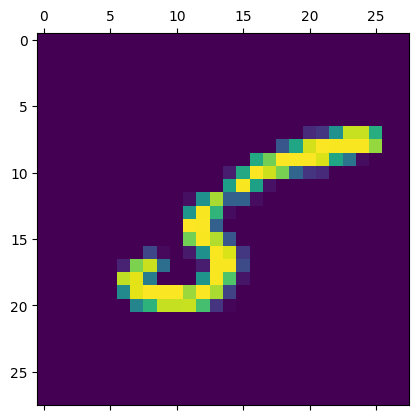

In [5]:
#Now plotting any one image randomly using matplotlib.pyplot
plt.matshow(X_train[11])

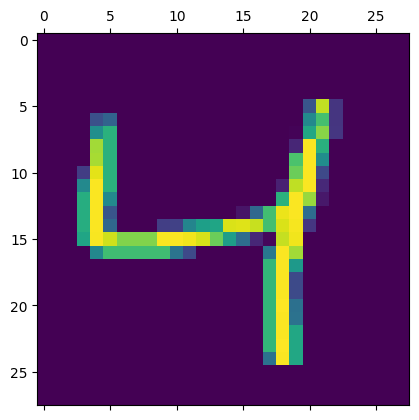

In [6]:
plt.matshow(X_train[2])

In [7]:
y_train[2]

4

## Scaling X_train and X_test

In [8]:
X_train = X_train/255
X_test = X_test/255

## Flattening data

In [9]:
#Flattening an image
X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

print("Flattened X_train shape: ", X_train_flattened.shape)
print("Flattened X_test shape: ", X_test_flattened.shape)

Flattened X_train shape:  (60000, 784)
Flattened X_test shape:  (10000, 784)


## Building Neural Network

In [10]:
# creating a neural network with one input layer and defining 10 outputs with activation function as sigmoid
model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (784,), activation = 'sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4696 - accuracy: 0.8767
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3034 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2832 - accuracy: 0.9214
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2730 - accuracy: 0.9232
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2665 - accuracy: 0.9266


In [11]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2675 - accuracy: 0.9247


[0.2675148546695709, 0.9247000217437744]

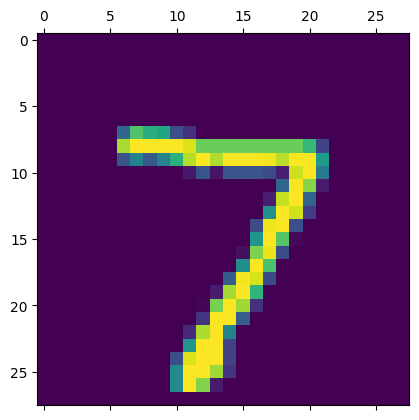

In [12]:
plt.matshow(X_test[0])

In [13]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 1s 3ms/step


array([3.3594050e-02, 2.2110815e-07, 3.3391472e-02, 9.3693691e-01,
       1.9128277e-03, 9.6765235e-02, 9.1012731e-07, 9.9980736e-01,
       9.1520652e-02, 5.3670835e-01], dtype=float32)

In [14]:
np.argmax(y_predicted[0])

7

In [15]:
y_test[:5]

array([7, 2, 1, 0, 4], dtype=uint8)

In [16]:
#Creating ypredicted_labels for y_predicted as it should be same as y_test values to be used in confusion matrix func of tf.math
y_predicted_labels = [np.argmax(i) for i in y_predicted]
print(y_predicted_labels[:5])


[7, 2, 1, 0, 4]


## Checking Performance of model

In [17]:
conf_matrix = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
conf_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    0,    2,    0,    5,    4,    2,    2,    0],
       [   0, 1115,    3,    2,    0,    1,    4,    2,    8,    0],
       [  10,   11,  912,   18,    7,    4,   13,   12,   41,    4],
       [   4,    0,   15,  919,    0,   23,    3,   15,   25,    6],
       [   1,    1,    4,    1,  913,    0,   10,    7,    9,   36],
       [  10,    3,    2,   31,   11,  766,   18,    8,   35,    8],
       [  14,    3,    6,    1,    7,   10,  912,    2,    3,    0],
       [   1,    5,   21,    4,    6,    0,    0,  967,    3,   21],
       [   8,    9,    5,   21,    9,   18,   10,   15,  873,    6],
       [  11,    7,    1,   10,   24,    6,    0,   37,    8,  905]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Truth')

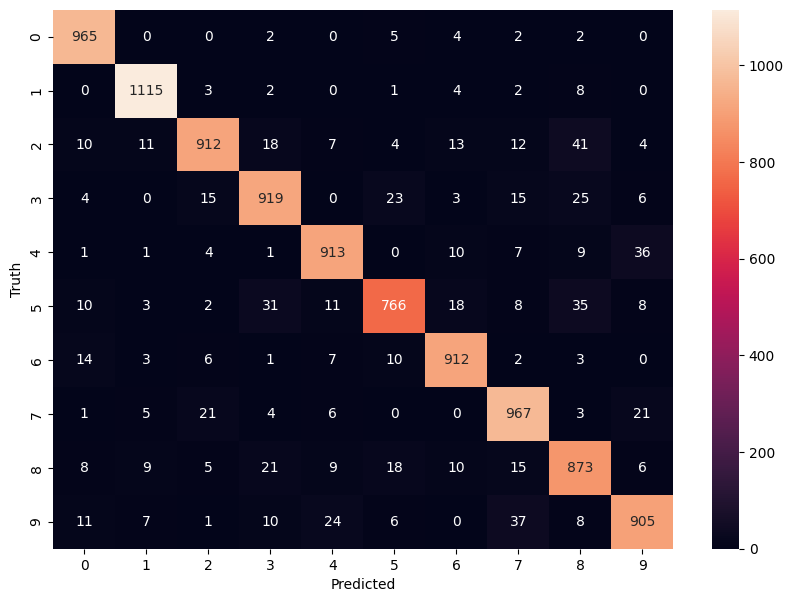

In [18]:
# visualizing this confusion matrix in an appealing manner using seaborn library
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')



Here the diagnol represents the number of times a value is predicted correctly. All other values except diagnol represents error. But confusion matrix is a great way to check the performance of the model.

## Adding a hidden layer

In [19]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape = (784,), activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train_flattened,y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2627 - accuracy: 0.9260
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1160 - accuracy: 0.9657
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0830 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0637 - accuracy: 0.9807
Epoch 5/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0503 - accuracy: 0.9840


In [20]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0751 - accuracy: 0.9761


[0.07509983330965042, 0.9761000275611877]

313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

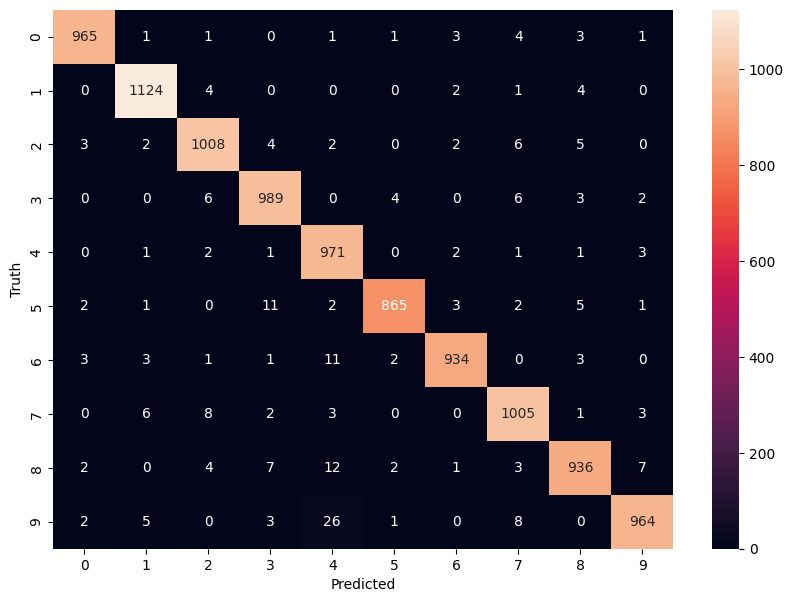

In [21]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
conf_matrix = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Adam (Adaptive Moment Estimation):

Adam is an adaptive learning rate optimizer that combines the advantages of both RMSprop and Momentum. It adapts the learning rates for each parameter and keeps track of both the first-order moment (the mean) and the second-order moment (the uncentered variance) of the gradients. Adam is known for its efficiency and is often a good choice for a wide range of tasks.

In [22]:
#If we do not want to flatten our data. Then we can keras inbuilt keras.layers.Flatten function before applying activation layers
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=5)


Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2779 - accuracy: 0.9212
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1270 - accuracy: 0.9623
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0879 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0660 - accuracy: 0.9806
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0518 - accuracy: 0.9844


313/313 [==============================] - 1s 2ms/step


Text(95.72222222222221, 0.5, 'Truth')

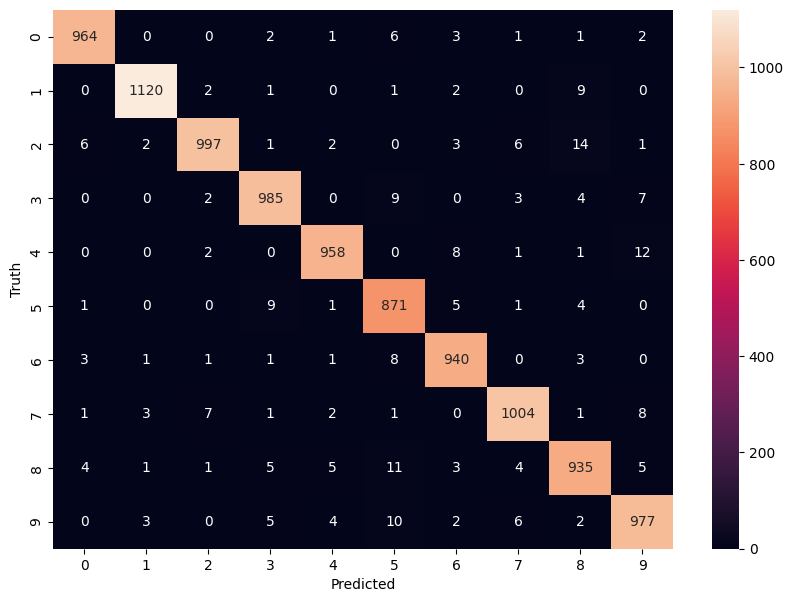

In [25]:
y_predicted = model.predict(X_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
conf_matrix = tf.math.confusion_matrix(labels = y_test, predictions = y_predicted_labels)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Experimenting with different types of optimizers

### Stochastic Gradient Descent (SGD):

SGD is a basic and widely used optimizer. It updates model parameters using the gradient of the loss function with respect to the parameters. It's simple and computationally efficient but can have trouble converging in some cases.

In [26]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])
model.compile(
    optimizer='SGD',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6479 - accuracy: 0.8338
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3392 - accuracy: 0.9055
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2930 - accuracy: 0.9173
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2648 - accuracy: 0.9250
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2431 - accuracy: 0.9314


### RMSprop (Root Mean Square Propagation):

RMSprop is another adaptive learning rate optimizer that adjusts the learning rates for each parameter individually. It helps mitigate some of the issues with SGD by adapting the learning rates over time.

In [27]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])
model.compile(
    optimizer='RMSprop',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2705 - accuracy: 0.9245
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1298 - accuracy: 0.9621
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0944 - accuracy: 0.9722
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0769 - accuracy: 0.9771
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0636 - accuracy: 0.9816


### Adagrad (Adaptive Gradient Algorithm):

Adagrad adapts the learning rate for each parameter based on the historical gradient information. It's particularly useful when dealing with sparse data, but it may have issues with convergence on some problems.

In [28]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])
model.compile(
    optimizer='Adagrad',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.2268 - accuracy: 0.7207
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6360 - accuracy: 0.8578
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5134 - accuracy: 0.8759
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4571 - accuracy: 0.8853
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4234 - accuracy: 0.8912


### Nadam (Nesterov-accelerated Adaptive Moment Estimation):

Nadam combines the Nesterov Accelerated Gradient (NAG) and Adam techniques. It uses the advantages of both methods, which makes it suitable for many deep learning tasks.

In [29]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])
model.compile(
    optimizer='Nadam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2755 - accuracy: 0.9223
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.1248 - accuracy: 0.9639
Epoch 3/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0881 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0666 - accuracy: 0.9798
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0535 - accuracy: 0.9829


### AdaDelta:

AdaDelta is another adaptive learning rate optimization algorithm that aims to improve upon Adagrad. It keeps a running average of both the past squared gradients and the past squared parameter updates to adapt the learning rates.

In [30]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])
model.compile(
    optimizer='AdaDelta',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 2.2886 - accuracy: 0.1085
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.1422 - accuracy: 0.2455
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.0071 - accuracy: 0.4015
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.8774 - accuracy: 0.5229
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7523 - accuracy: 0.6026


### FTRL (Follow-the-Regularized-Leader):

FTRL is an optimizer that is particularly well-suited for large-scale and online learning problems. It combines L1 and L2 regularization and is known for its efficiency in handling high-dimensional feature spaces.

In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])
model.compile(
    optimizer='FTRL',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3014 - accuracy: 0.1346
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2350 - accuracy: 0.2768
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.8407 - accuracy: 0.4868
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 1.3750 - accuracy: 0.6344
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.1032 - accuracy: 0.6963


Out of all these optimizers, the best performance is given by adam optimizer.

## Experimenting with different types of loss functions

### Sparse Categorical Cross-Entropy (Sparse CCE)

This is a widely used loss function for multi-class classification when labels are represented as integers. It's suitable when each data point has a single correct class label. Sparse CCE calculates the cross-entropy between the predicted class probabilities and the true class labels, where the true labels are integers. In deep learning libraries like TensorFlow and Keras, you can use this loss function, and it's efficient when you have a large number of classes.

In [33]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2756 - accuracy: 0.9219
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1228 - accuracy: 0.9638
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0850 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0658 - accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0522 - accuracy: 0.9840


### Kullback-Leibler Divergence (KL Divergence):

KL Divergence is used when you want to measure the difference between the predicted probability distribution and the true probability distribution. It is often used in scenarios where you have soft labels.

In [36]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])
model.compile(
    optimizer='adam',
    loss='kl_divergence',
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 3ms/step - loss: 0.0226 - accuracy: 0.1142
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 4.9387e-06 - accuracy: 0.1027
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: -9.4183e-08 - accuracy: 0.1003
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: -1.1207e-06 - accuracy: 0.0999
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: -1.4260e-06 - accuracy: 0.0993


### Hinge Loss (Multi-Class SVM Loss):

Hinge loss is often used for Support Vector Machines (SVMs) and can be adapted for deep learning multi-class classification problems. It aims to maximize the margin between the correct class and the other classes.

In [37]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])
model.compile(
    optimizer='adam',
    loss='hinge',
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0992 - accuracy: 0.0692
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0987 - accuracy: 0.0824
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0987 - accuracy: 0.0891
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0987 - accuracy: 0.0926
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0987 - accuracy: 0.0949


## Experimenting with different types of activation functions

### Activation Functions for the Hidden Layer:

* Rectified Linear Unit (ReLU):

ReLU is one of the most widely used activation functions for hidden layers. It is computationally efficient and helps with mitigating the vanishing gradient problem.

* Leaky ReLU:

Leaky ReLU is a variant of ReLU that allows a small gradient when the unit is not active. It can help with mitigating the dying ReLU problem.

* Parametric ReLU (PReLU):

PReLU is an extension of Leaky ReLU, where the slope of the negative part of the function is learned during training.

* Exponential Linear Unit (ELU):

ELU is another variant of ReLU that can help with vanishing gradient problems. It has an exponential slope for negative inputs.

* Scaled Exponential Linear Unit (SELU):

SELU is a self-normalizing activation function that can improve network performance. It relies on specific properties to maintain stable mean and variance during training.

## Activation Functions for the Output Layer:

* Softmax:

Softmax is commonly used in the output layer for multi-class classification problems. It transforms the network's raw scores into a probability distribution over multiple classes, making it suitable for multi-class classification tasks.

* Sigmoid:

Sigmoid is useful for binary classification problems but can be adapted for multi-class problems by using one-vs-all or one-vs-one strategies. It provides class probabilities for each class independently.

* Logistic Function:

Similar to Sigmoid, the logistic function can be used for multi-class classification by applying one-vs-all or one-vs-one techniques.

* Tanh (Hyperbolic Tangent):

Tanh is a rescaled version of the logistic sigmoid function that maps input values to the range [-1, 1]. It can be used in the output layer for multi-class problems with suitable transformations.

* Linear Activation Function:

In some cases, especially with regression tasks or specialized architectures like autoencoders, a linear activation function in the output layer may be appropriate.

In [45]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'Softmax')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2686 - accuracy: 0.9236
Epoch 2/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1225 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0867 - accuracy: 0.9745
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0659 - accuracy: 0.9796
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0516 - accuracy: 0.9839


In [46]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'linear')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3482 - accuracy: 0.2470
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3026 - accuracy: 0.2377
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3026 - accuracy: 0.2377
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3026 - accuracy: 0.2377
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3026 - accuracy: 0.2377


In [47]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(10, activation = 'tanh')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2979 - accuracy: 0.5146
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2818 - accuracy: 0.3940
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.2883 - accuracy: 0.2490
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3017 - accuracy: 0.2273
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3017 - accuracy: 0.2274


In [50]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'LeakyReLU'),
    keras.layers.Dense(10, activation = 'sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3093 - accuracy: 0.9118
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1700 - accuracy: 0.9502
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1269 - accuracy: 0.9627
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1004 - accuracy: 0.9701
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0835 - accuracy: 0.9744


In [51]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'PReLU'),
    keras.layers.Dense(10, activation = 'sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2642 - accuracy: 0.9249
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1131 - accuracy: 0.9669
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0773 - accuracy: 0.9764
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0597 - accuracy: 0.9813
Epoch 5/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0459 - accuracy: 0.9855


In [52]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'ELU'),
    keras.layers.Dense(10, activation = 'sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3068 - accuracy: 0.9114
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1497 - accuracy: 0.9567
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1012 - accuracy: 0.9698
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0754 - accuracy: 0.9771
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0590 - accuracy: 0.9815


In [54]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(100, activation = 'selu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3196 - accuracy: 0.9069
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1757 - accuracy: 0.9486
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1219 - accuracy: 0.9638
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0935 - accuracy: 0.9719
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0728 - accuracy: 0.9780
